In [1]:
#Import all the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Using pandas read the data into the notebook

df = pd.read_csv('/Users/mehakagrawal/Desktop/Cleveland_Data.csv')

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [3]:
df.shape

(303, 14)

In [4]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  target  
0        3  0.0   6.0

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#Check for any null/missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [10]:
# Fill missing values in 'ca' and 'thal' columns with the mean
df['ca'].fillna(df['ca'].mean(), inplace=True)  
df['thal'].fillna(df['thal'].mean(), inplace=True)

print(df[['ca', 'thal']].isnull().sum())

ca      0
thal    0
dtype: int64


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#Define the target variable

target = 'target'
print(df['target'].value_counts())

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64


In [13]:
## Create numerical and categorical columns and print the length

numerical = df.select_dtypes(include=['float64', 'int64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 0 Categorical variables
There are 14 Numerical variables


In [14]:
#X represents input features and y is the target value

X = df.drop('target', axis=1)
y = df['target']

In [15]:
#Perform standard scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Train a Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Prediction on test set
y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)

In [18]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score (multi-class)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.10      0.08      0.09        12
           2       0.00      0.00      0.00         9
           3       0.29      0.29      0.29         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.22      0.26      0.24        61
weighted avg       0.40      0.49      0.44        61

ROC-AUC Score: 0.71


In [19]:
# Perform GridSearchCV with cross-validation and obtain the Best Parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [20]:
#Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

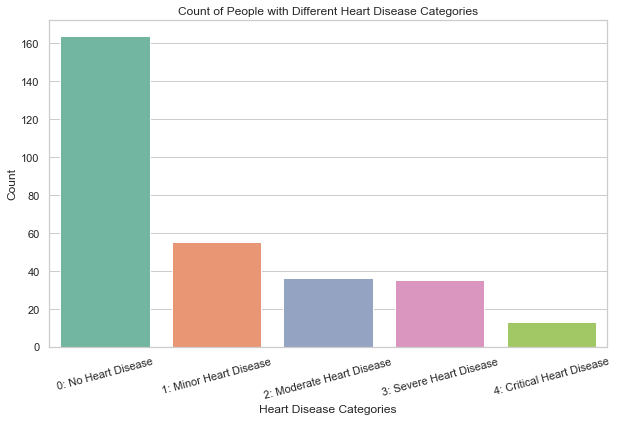

In [21]:
#Barplot
#Create a mapping for the target classes
target_mapping = {
    0: "0: No Heart Disease",
    1: "1: Minor Heart Disease",
    2: "2: Moderate Heart Disease",
    3: "3: Severe Heart Disease",
    4: "4: Critical Heart Disease"
}

# Map the target column in the DataFrame
df['target_names'] = df['target'].map(target_mapping)

plt.figure(figsize=(10, 6))

# Plot the barplot using the mapped target names
sns.set(style="whitegrid")
ax = sns.countplot(
    x='target_names', 
    data=df,
    palette='Set2',
    order=df['target_names'].value_counts().index
)

# Set axis labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease Categories')
plt.title('Count of People with Different Heart Disease Categories')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.show()

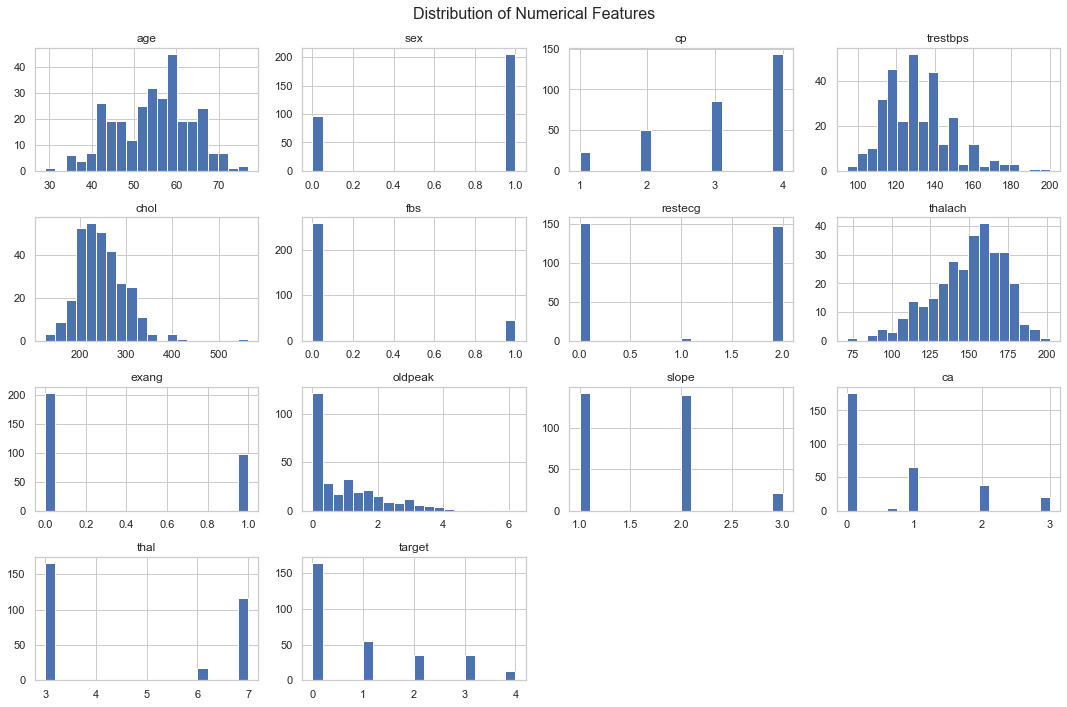

In [22]:
#Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

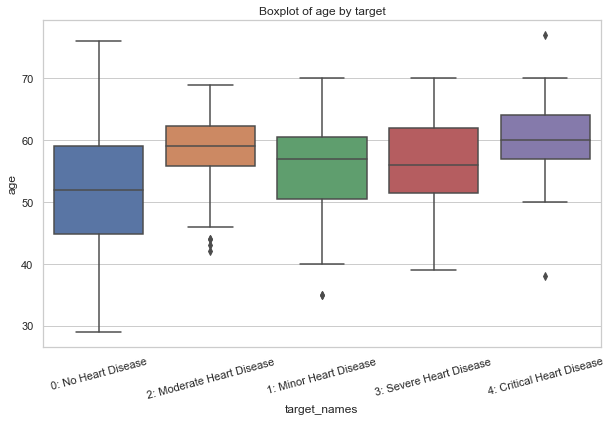

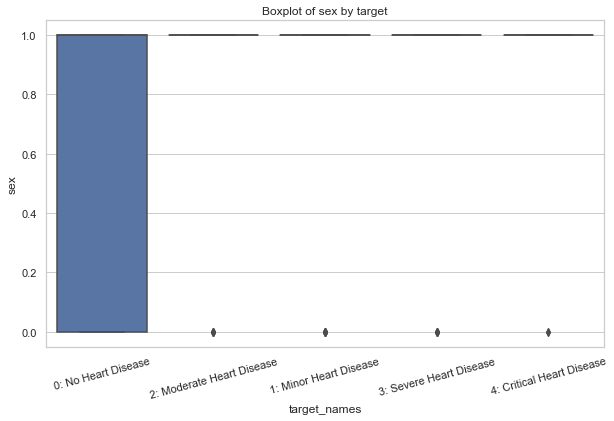

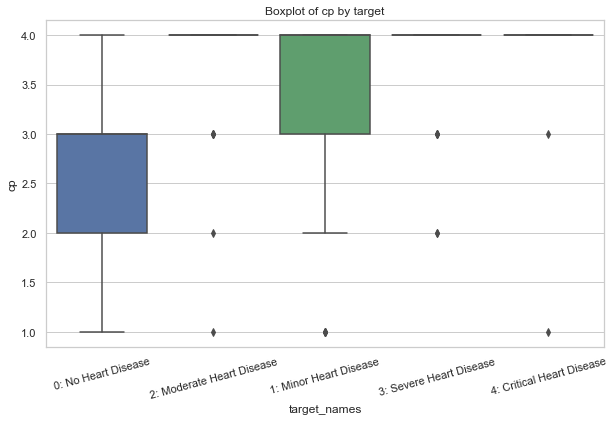

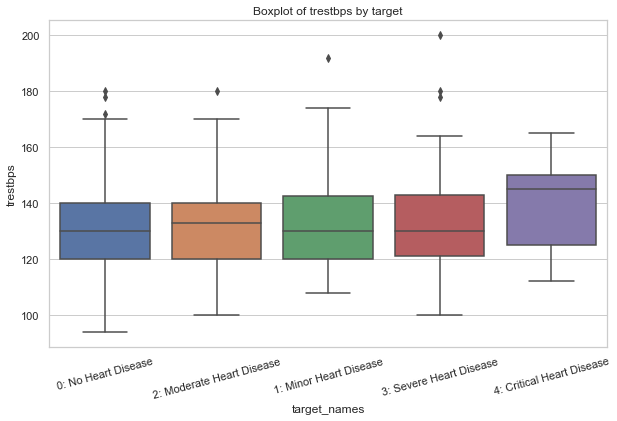

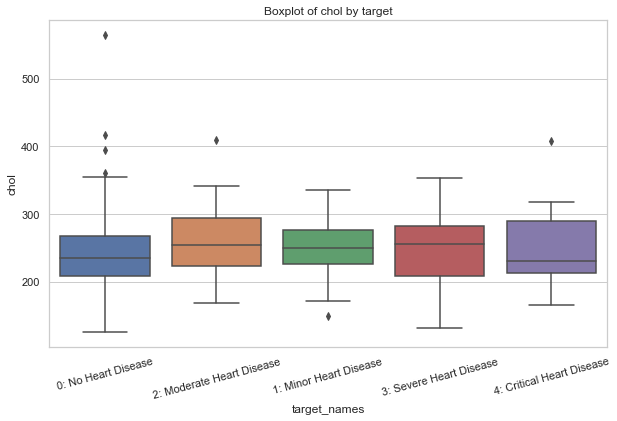

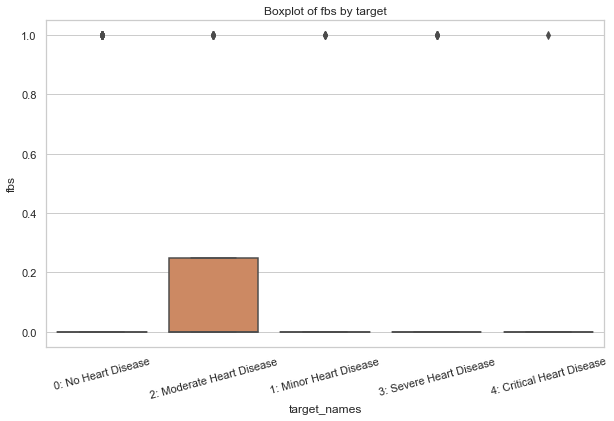

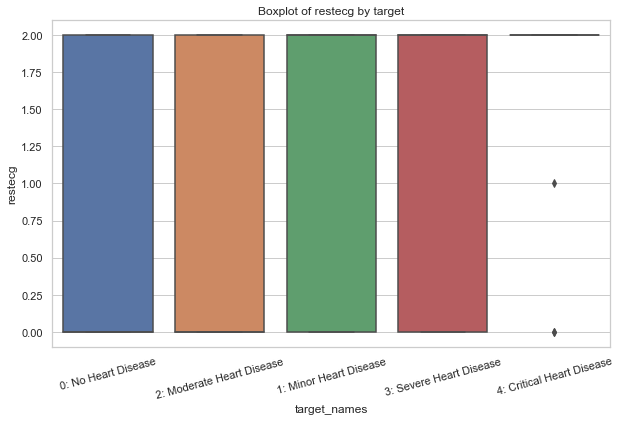

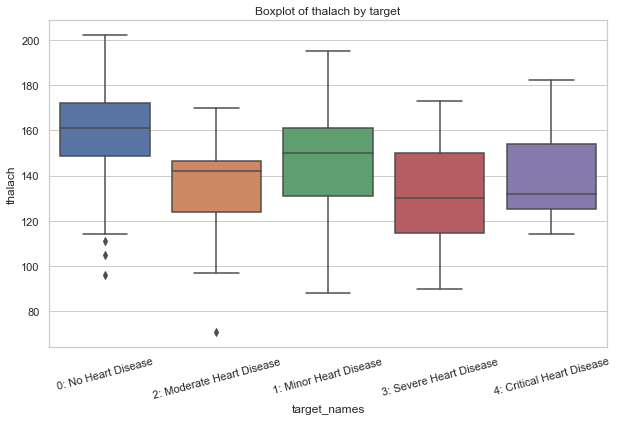

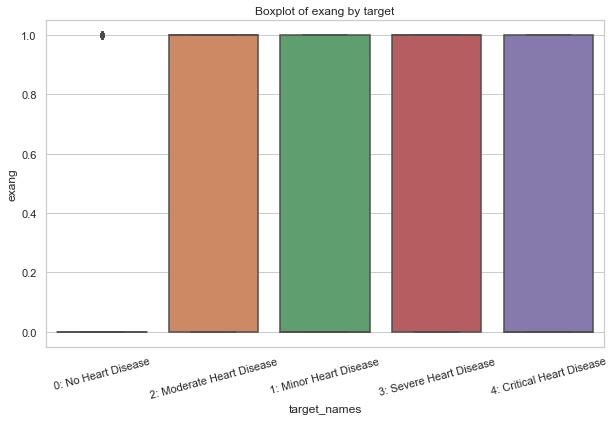

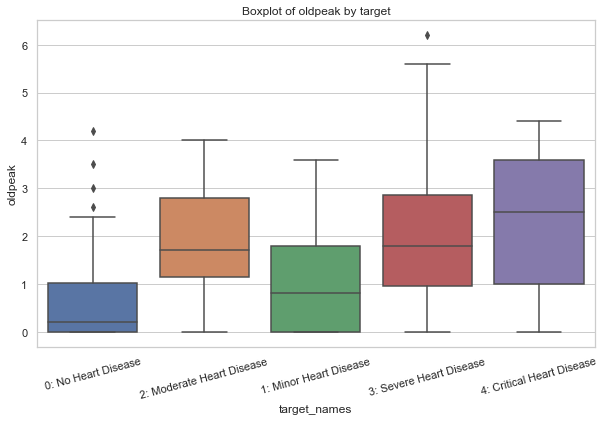

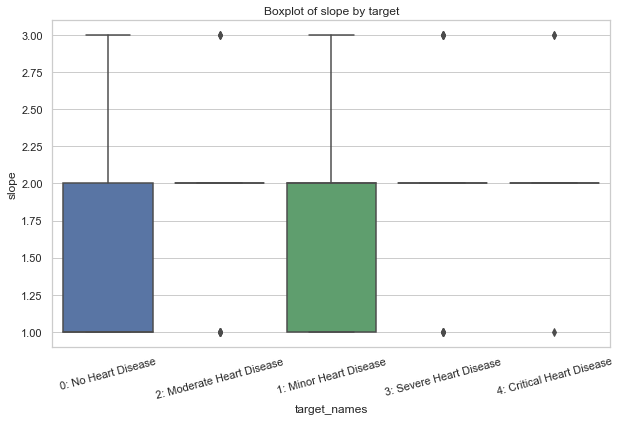

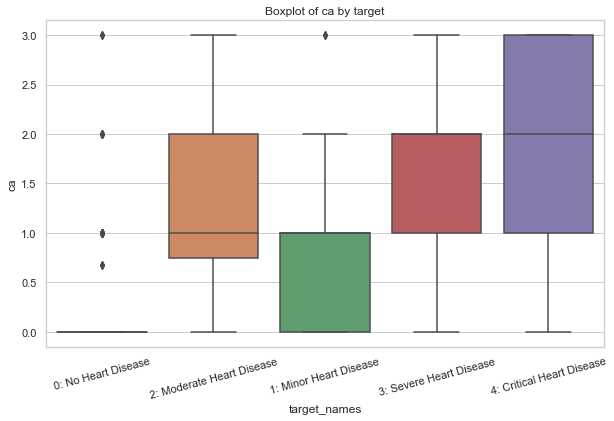

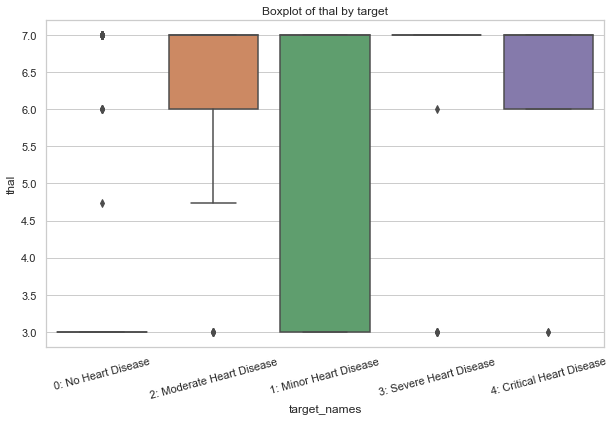

In [23]:
#Boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target_names', y=col, data=df)
        plt.title(f'Boxplot of {col} by {target}')
        plt.xticks(rotation=15)
        plt.show()

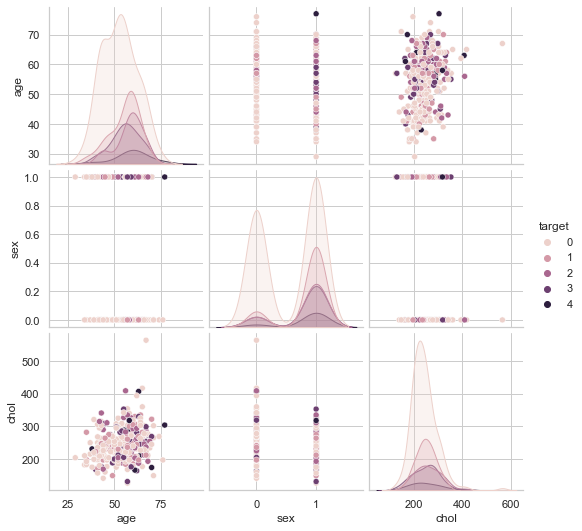

In [24]:
#Pairplot
sns.pairplot(df[['age', 'sex', 'chol', 'target']], hue='target')
plt.show()

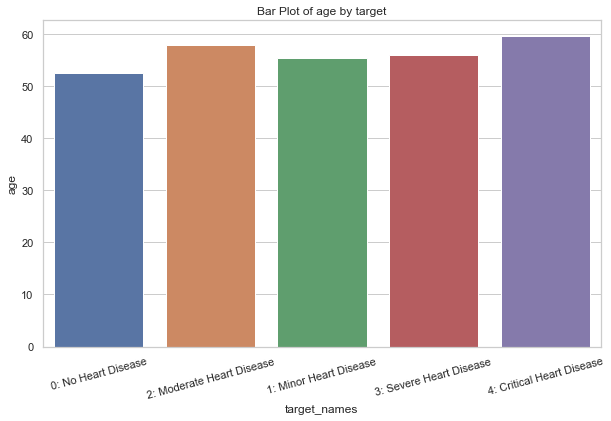

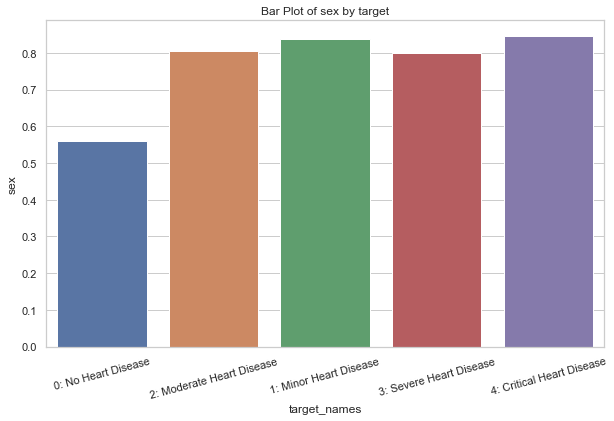

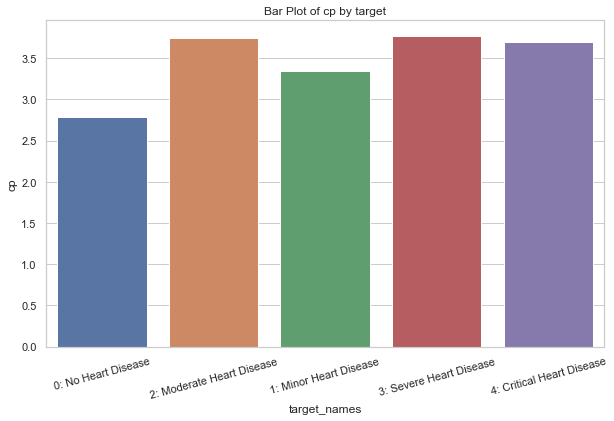

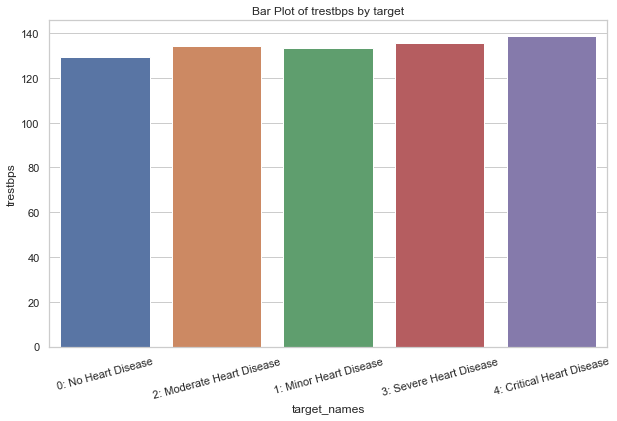

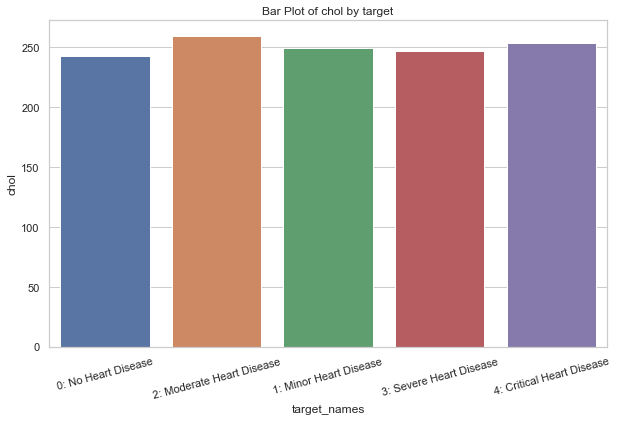

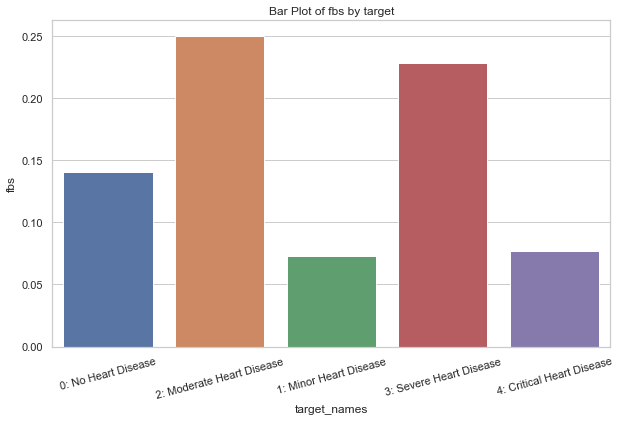

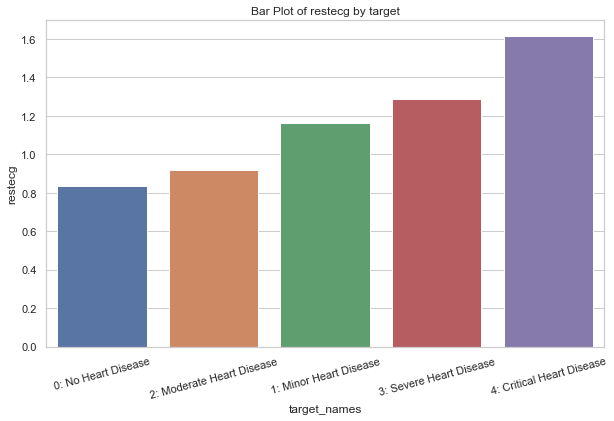

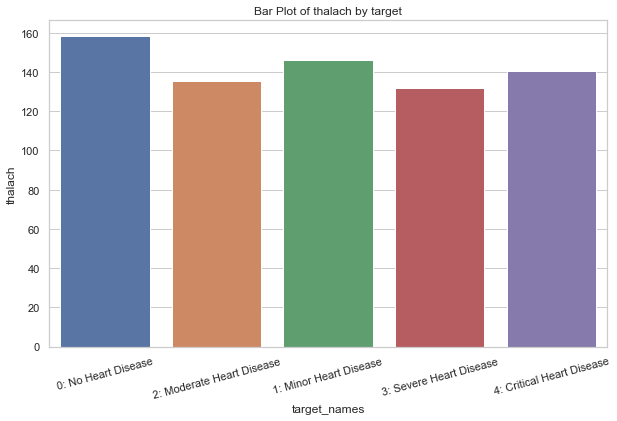

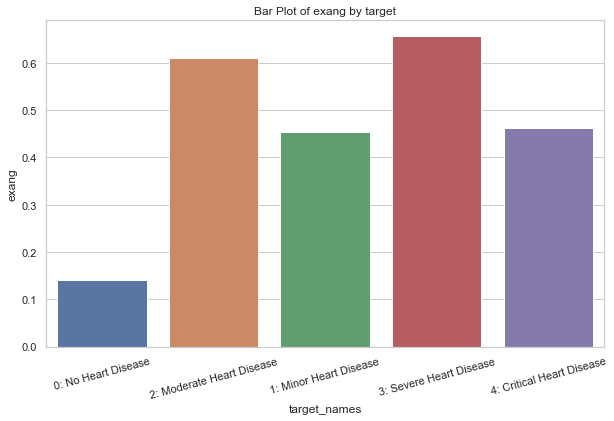

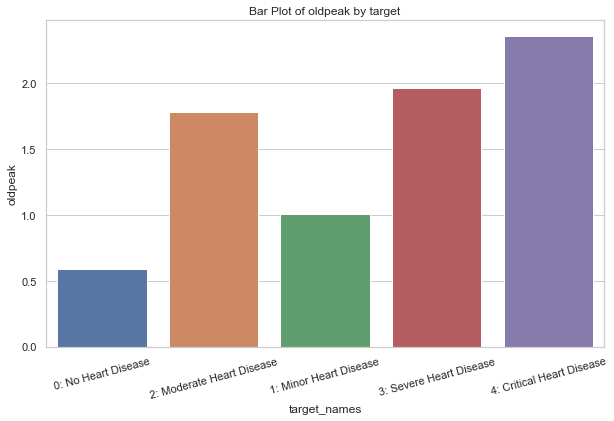

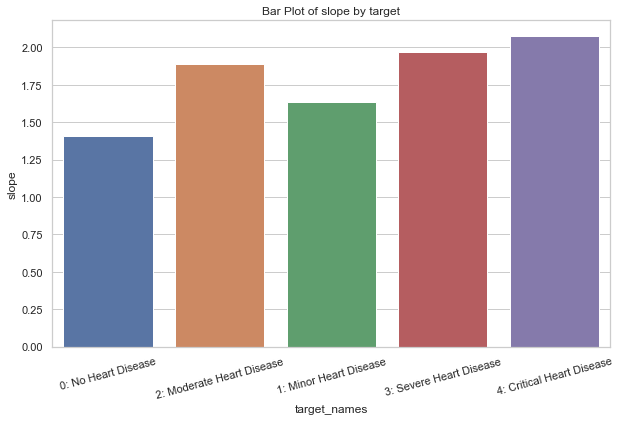

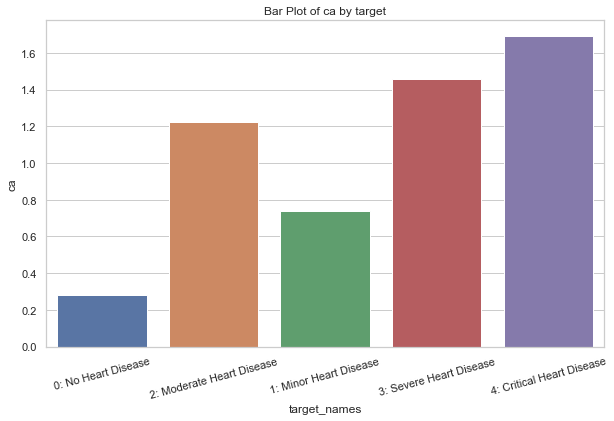

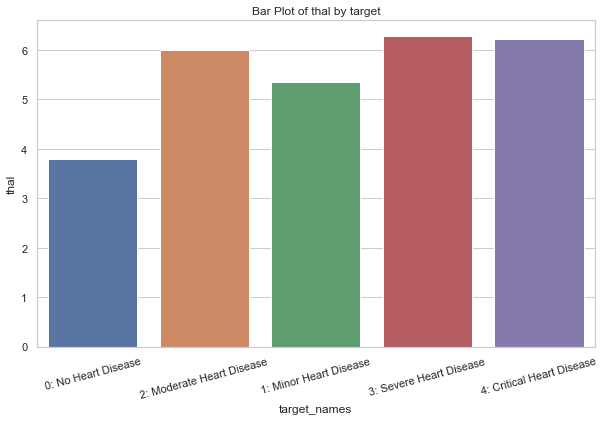

In [30]:
#Barplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='target_names', y=col, data=df, ci=None)
        plt.title(f'Bar Plot of {col} by {target}')
        plt.xticks(rotation=15)
        plt.show()

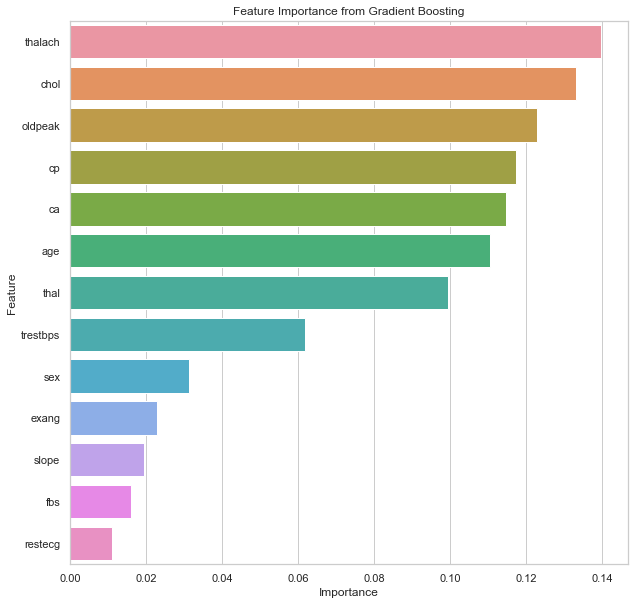

In [31]:
#Plot for Feature Importance
fea_imp = gb_clf.feature_importances_
fea = X.columns

imp_df = pd.DataFrame({'Feature': fea, 'Importance': fea_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

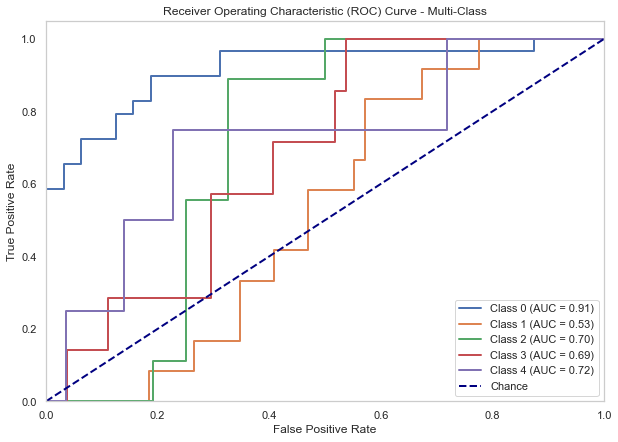

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (one-hot encoding for multi-class)
n_classes = len(set(y_test))
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

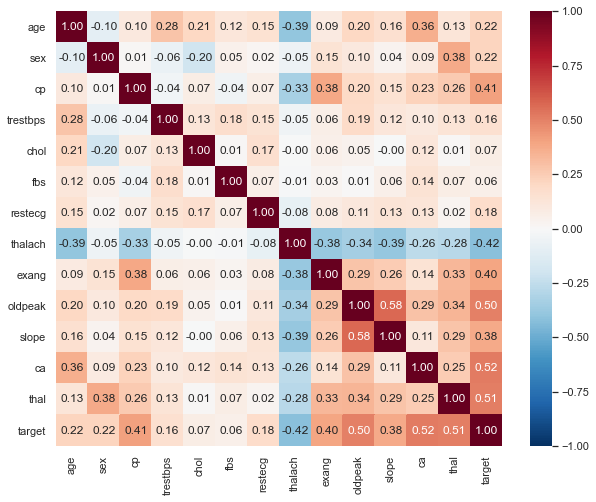

In [34]:
#Heatmap
import numpy as np

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()